In [46]:
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [147]:
cath_annotation_frame  = pd.read_table("../data/domain-classifications.tsv")
cath_topol_idxmap = dict(map(lambda x: x[::-1], enumerate(sorted(cath_annotation_frame.TOPOL.unique()))))
cath_annotation_frame['class'] = cath_annotation_frame.TOPOL.apply(cath_topol_idxmap.get) 

with open("../data/cath-dataset-nonredundant-S40.list", 'r') as caths40:
    cath_s40_domains = list(map(lambda x: x.strip(), caths40))
    
cath_annotation_frame = cath_annotation_frame[cath_annotation_frame.DOMAIN.isin(cath_s40_domains)].copy()
cath_annotation_frame.head()

,DOMAIN,CLASS,ARCH,TOPOL,HOMOL,class
0,1oaiA00,Mainly Alpha,Orthogonal Bundle,"Helicase, Ruva Protein; domain 3","DNA helicase RuvA subunit, C-terminal domain",510
4,3b89A01,Mainly Alpha,Orthogonal Bundle,"Helicase, Ruva Protein; domain 3","DNA helicase RuvA subunit, C-terminal domain",510
6,4heoA00,Mainly Alpha,Orthogonal Bundle,"Helicase, Ruva Protein; domain 3","DNA helicase RuvA subunit, C-terminal domain",510
12,4wp2A00,Mainly Alpha,Orthogonal Bundle,"Helicase, Ruva Protein; domain 3","DNA helicase RuvA subunit, C-terminal domain",510
16,1oksA00,Mainly Alpha,Orthogonal Bundle,"Helicase, Ruva Protein; domain 3","DNA helicase RuvA subunit, C-terminal domain",510


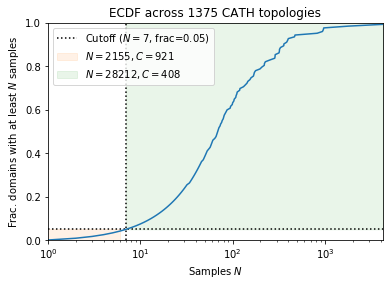

In [184]:
vc = cath_annotation_frame['class'].value_counts() # counts of each topology class
counts = vc.values                              
counts_counts = Counter(counts)                    # frequency of each count (i.e, 99 classes with 1 sample)

unique_counts = sorted(list(counts_counts.keys())) # unique set of count values (size K)
dist = np.array(range(len(unique_counts))) / float(len(unique_counts)) # K linearly spaced bins

frac = 0.05
closest = min(dist, key=lambda x: abs(x - frac))
idx   = list(dist).index(closest)
xval = unique_counts[idx]  # the count value @ corresponding to frac (the yval)
lower  = vc[vc < xval] # the number of classes for which the counts are less than or
higher = vc[vc > xval] # greater than the cutoff

# classes
nc_high = len(higher)
nc_low  = len(lower)
# counts
n_high = higher.sum()
n_low  = lower.sum()

# plot cross lines
plt.axvline(xval, linestyle=':', color='k', label=f"Cutoff ($N={xval}$, frac={frac})")
plt.axhline(closest, linestyle=':', color='k')

# fill regions
# lower box
lb_lbl = f"$N = {n_low}, C = {nc_low}$"
plt.fill_between(range(0, xval), plt.ylim()[0], closest, alpha=0.1, color='C1', label=lb_lbl)

# upper box
ub_lbl = f"$N = {n_high}, C = {nc_high}$"
plt.fill_between(range(xval, max(counts)), closest, 1, alpha=0.1, color='C2', label=ub_lbl)
#plt.axvspan(min(counts), xval, ymax=)

plt.ylim(0, 1)
plt.xlim(min(counts), max(counts))
plt.xscale('log')
plt.plot(unique_counts, dist)
plt.title(f"ECDF across {len(vc)} CATH topologies")
plt.xlabel("Samples $N$")
plt.ylabel("Frac. domains with at least $N$ samples")
plt.legend()
plt.show()

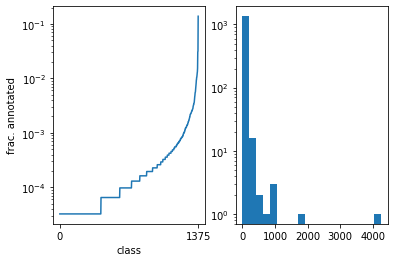

In [181]:
# fraction annotated per class
fig, (ax1, ax2) = plt.subplots(1, 2)
frac = vc.sort_values() / vc.sum()
ax1.plot(frac.values)
ax1.set_yscale('log')
ax1.set_xlabel('class')
ax1.set_ylabel('frac. annotated')
ax1.set_xticks([0, len(vc)])
ax2.set_yscale('log')
ax2.hist(vc.values, bins=20)
#ax2.set_yscale('log')
plt.show()
#plt.plot(v)
